# **Topic: 3. Spam Detection in Emails** <br>
**Objective:** Classify emails as spam or non-spam. <br>
**Dataset:** Any Dataset <br>
**Tasks:** <br>
 1. Tokenize text and represent it with BoW/N-grams.
 2. Train a binary classifier (e.g., Logistic Regression, SVM, KNN).
 3. Fine-tune hyperparameters to improve model performance.
 4. Explain results using metrics like confusion matrix, ROC-AUC.

# <b>1.) Tokenize text and represent it with BoW / N-grams

## <b> 1.1) Data Loading and Data Cleaning

### 1.1.) Import Libraries

In [85]:
# Import necessary libraries
import numpy as np
import pandas as pd
import re
import string

# text preprocessing
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import re
from collections import Counter
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Machine Learning
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


[nltk_data] Downloading package stopwords to C:\Users\Rog
[nltk_data]     Strix\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Rog
[nltk_data]     Strix\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [86]:
df = pd.read_csv("spam.csv",encoding='latin1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


### 1.2 Data Cleaning

In [87]:
df.shape

(5572, 5)

In [88]:
df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)

In [89]:
df.rename(columns={'v1':'Type','v2': 'Emails'}, inplace=True)
df

,Type,Emails
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


#### 1.2.1. Missing Value

In [90]:
df.isnull().sum()

Type      0
Emails    0
dtype: int64

#### 1.2.2. Duplicated data

In [91]:
df[df.duplicated()]

,Type,Emails
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [92]:
df = df.drop_duplicates(keep='first')

In [93]:
df

,Type,Emails
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## <b> 1.2.) text Prepocessing

### 1.2.1.) Lowercasing

In [94]:
df['text1']=df['Emails'].str.lower()

C:\Users\Rog Strix\AppData\Local\Temp\ipykernel_5276\2626173525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text1']=df['Emails'].str.lower()


In [95]:
df['text1'].head(n=3)

0    go until jurong point, crazy.. available only ...
1                        ok lar... joking wif u oni...
2    free entry in 2 a wkly comp to win fa cup fina...
Name: text1, dtype: object

In [96]:
df['text']= df['text1'].apply(word_tokenize)

C:\Users\Rog Strix\AppData\Local\Temp\ipykernel_5276\358266840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text']= df['text1'].apply(word_tokenize)


In [97]:
df['text'].head(n=3)

0    [go, until, jurong, point, ,, crazy, .., avail...
1             [ok, lar, ..., joking, wif, u, oni, ...]
2    [free, entry, in, 2, a, wkly, comp, to, win, f...
Name: text, dtype: object

### 1.2.2.) Removing special characters

In [98]:
df['text'] = df['text'].apply(lambda x: [re.sub(r'[^a-zA-Z\s]', '', word) for word in x])

C:\Users\Rog Strix\AppData\Local\Temp\ipykernel_5276\1627698363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: [re.sub(r'[^a-zA-Z\s]', '', word) for word in x])


In [99]:
df['text']

0       [go, until, jurong, point, , crazy, , availabl...
1                      [ok, lar, , joking, wif, u, oni, ]
2       [free, entry, in, , a, wkly, comp, to, win, fa...
3       [u, dun, say, so, early, hor, , u, c, already,...
4       [nah, i, do, nt, think, he, goes, to, usf, , h...
                              ...                        
5567    [this, is, the, nd, time, we, have, tried, , c...
5568        [will, , b, going, to, esplanade, fr, home, ]
5569    [pity, , , was, in, mood, for, that, , so, , a...
5570    [the, guy, did, some, bitching, but, i, acted,...
5571                   [rofl, , its, true, to, its, name]
Name: text, Length: 5169, dtype: object

### 1.2.3.) Removing Stopwords and Punctuation

In [100]:
# Removing stop words and punctuation
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: [word for word in x if word not in stop_words and word not in string.punctuation])

C:\Users\Rog Strix\AppData\Local\Temp\ipykernel_5276\1702871821.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: [word for word in x if word not in stop_words and word not in string.punctuation])


In [101]:
df['text']

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, wkly, comp, win, fa, cup, final,...
3           [u, dun, say, early, hor, u, c, already, say]
4       [nah, nt, think, goes, usf, lives, around, tho...
                              ...                        
5567    [nd, time, tried, contact, u, u, pound, prize,...
5568                      [b, going, esplanade, fr, home]
5569                            [pity, mood, suggestions]
5570    [guy, bitching, acted, like, interested, buyin...
5571                                   [rofl, true, name]
Name: text, Length: 5169, dtype: object

### 1.2.4.) Removal of URLs

In [102]:
def remove_urls(text):
    if isinstance(text, str):  # Check if the value is a string
        url_pattern = r'https?://\S+|www\.\S+'
        return re.sub(url_pattern, '', text)
    return text  # Return the original value if it's not a string

# Apply the function to the 'text' column
df['text'] = df['text'].apply(remove_urls)

C:\Users\Rog Strix\AppData\Local\Temp\ipykernel_5276\2583676032.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(remove_urls)


In [103]:
df['text']

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, wkly, comp, win, fa, cup, final,...
3           [u, dun, say, early, hor, u, c, already, say]
4       [nah, nt, think, goes, usf, lives, around, tho...
                              ...                        
5567    [nd, time, tried, contact, u, u, pound, prize,...
5568                      [b, going, esplanade, fr, home]
5569                            [pity, mood, suggestions]
5570    [guy, bitching, acted, like, interested, buyin...
5571                                   [rofl, true, name]
Name: text, Length: 5169, dtype: object

### 1.2.5.) Stemming

In [104]:
# Stemming
ps = PorterStemmer()
df['text'] = df['text'].apply(lambda x: [ps.stem(word) for word in x])

C:\Users\Rog Strix\AppData\Local\Temp\ipykernel_5276\3461210920.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: [ps.stem(word) for word in x])


In [105]:
# Convert the preprocessed text back to string
df['text'] = df['text'].apply(lambda x: ' '.join(x))

C:\Users\Rog Strix\AppData\Local\Temp\ipykernel_5276\613658509.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: ' '.join(x))


In [106]:
df['text']

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri wkli comp win fa cup final tkt st m...
3                     u dun say earli hor u c alreadi say
4                 nah nt think goe usf live around though
                              ...                        
5567    nd time tri contact u u pound prize claim easi...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [107]:
df.head(n=5)

,Type,Emails,text1,text
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entri wkli comp win fa cup final tkt st m...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro...",nah nt think goe usf live around though


In [108]:
df = df.drop(columns=['text1'])
df.head(n=5)

,Type,Emails,text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah nt think goe usf live around though


In [109]:
df = df.rename(columns={'Type': 'type', 'Emails': 'emails'})
df.head(n=5)

,type,emails,text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah nt think goe usf live around though


### 1.2.6.) Frequency of email class

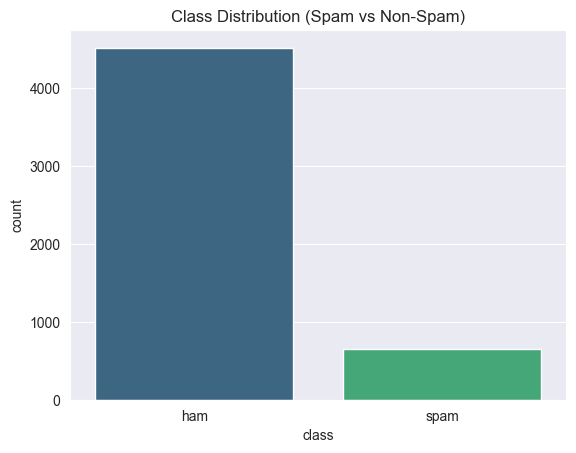

In [110]:
sns.countplot(x='type', data=df, hue='type', palette="viridis", legend=False)
plt.title("Class Distribution (Spam vs Non-Spam)")
plt.xlabel("class")
plt.ylabel("count")
plt.show();

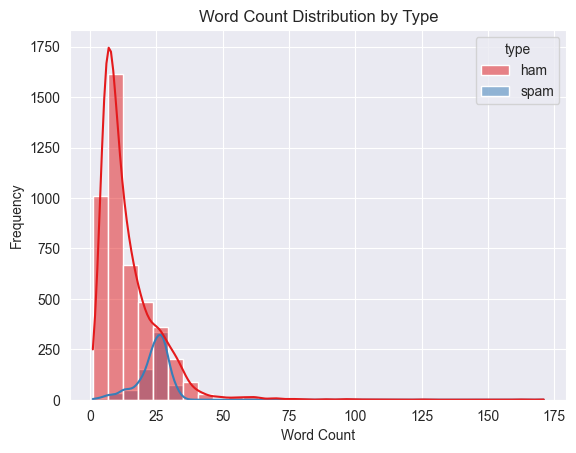

In [111]:
df.loc[:, 'word_count'] = df['emails'].apply(lambda x: len(x.split()))
sns.histplot(data=df, x='word_count', hue='type', bins=30, kde=True, palette="Set1")
plt.title("Word Count Distribution by Type") # Changed 'class' to 'Type'
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

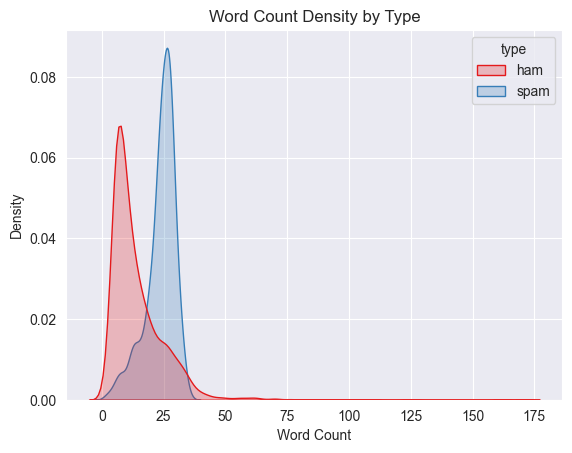

In [112]:
df.loc[:, 'word_count'] = df['emails'].apply(lambda x: len(x.split()))
sns.kdeplot(data=df, x='word_count', hue='type', fill=True, common_norm=False, palette="Set1")
plt.title("Word Count Density by Type")  # Changed 'class' to 'Type'
plt.xlabel("Word Count")
plt.ylabel("Density")
plt.show()

In [113]:
df.head(n=6)

,type,emails,text,word_count
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,20
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...,28
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah nt think goe usf live around though,13
5,spam,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey darl week word back like fun still...,32


### 1.2.7.) Wordcloud visualization

#### 1.2.7.1) Ham Emails

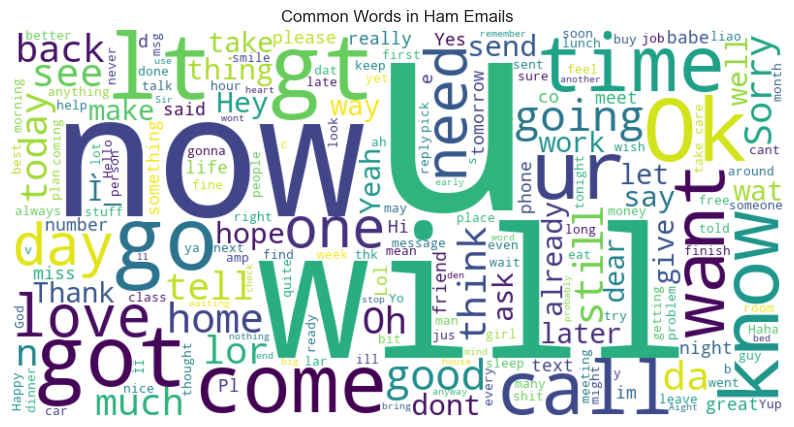

In [114]:
# Filter for ham emails
ham_text = df[df['type'] == 'ham']['emails'].str.cat(sep=' ')

# Create and generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and ticks
plt.title("Common Words in Ham Emails")  # Changed title
plt.show()

#### 1.2.7.2.) Spam Emails

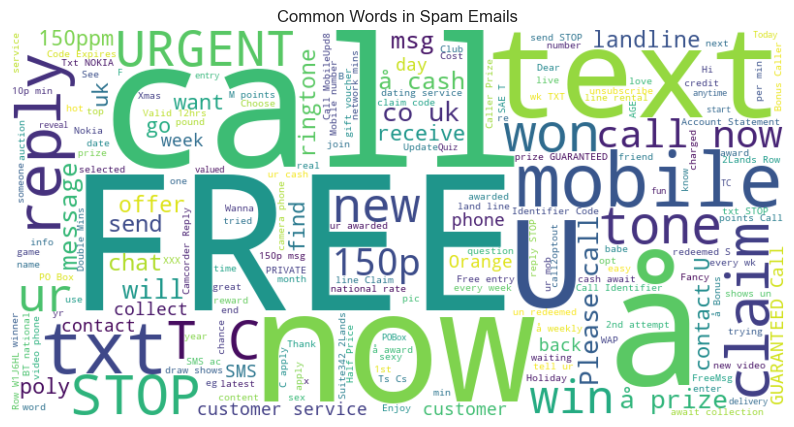

In [115]:
spam_text = df[df['type'] == 'spam']['emails'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in Spam Emails")
plt.show()

In [116]:
df[['text', 'word_count', 'type']]

,text,word_count,type
0,go jurong point crazi avail bugi n great world...,20,ham
1,ok lar joke wif u oni,6,ham
2,free entri wkli comp win fa cup final tkt st m...,28,spam
3,u dun say earli hor u c alreadi say,11,ham
4,nah nt think goe usf live around though,13,ham
...,...,...,...
5567,nd time tri contact u u pound prize claim easi...,30,spam
5568,b go esplanad fr home,8,ham
5569,piti mood suggest,10,ham
5570,guy bitch act like interest buy someth els nex...,26,ham


In [117]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

df['type'] = label_encoder.fit_transform(df['type'])
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Encoding Mapping:")
print(label_mapping)

Label Encoding Mapping:
{'ham': 0, 'spam': 1}


In [118]:
df.head(n=5)

,type,emails,text,word_count
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,20
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...,28
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,11
4,0,"Nah I don't think he goes to usf, he lives aro...",nah nt think goe usf live around though,13


In [119]:
spam_corpus = []
for message in df[df['type'] == 1]['text']:
    for word in message.split():
        spam_corpus.append(word)

print(len(spam_corpus))

9300


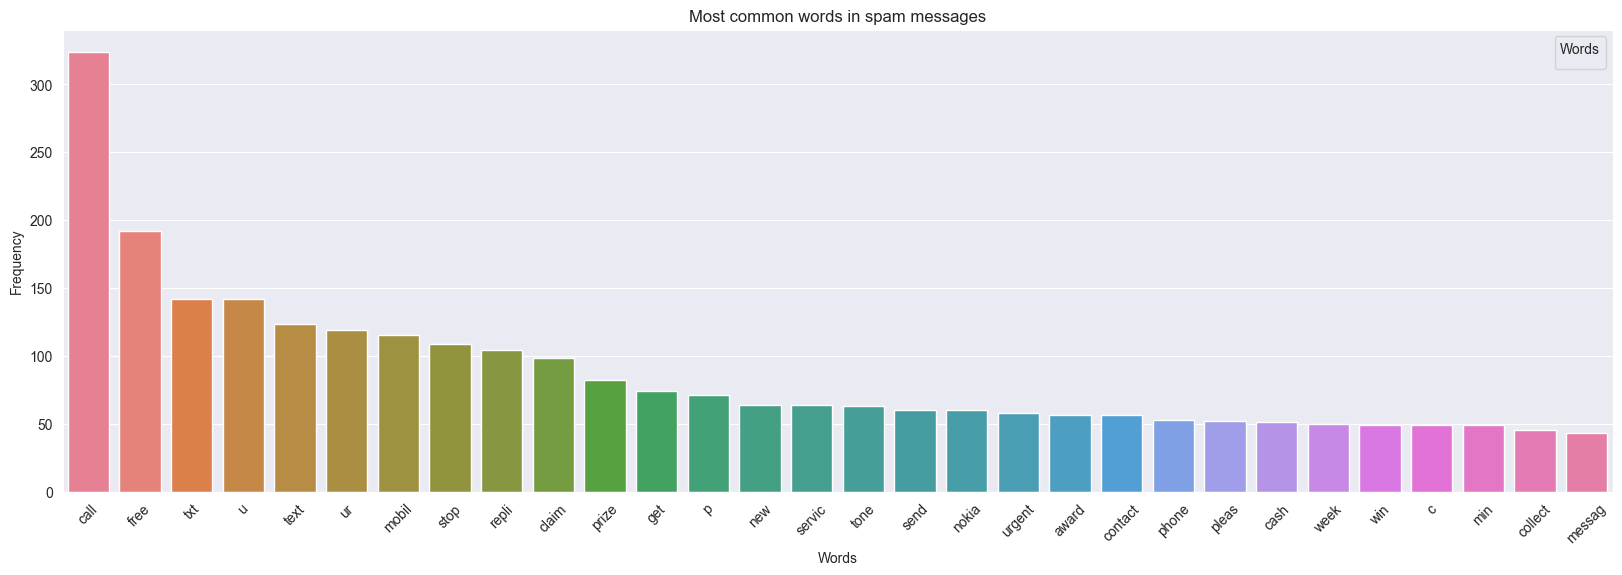

In [195]:
sns.set_style('darkgrid')
counter = Counter(spam_corpus)
plt.figure(figsize=(20, 6))
ax = sns.barplot(x=[item[0] for item in counter.most_common(30)],
                 y=[item[1] for item in counter.most_common(30)],
                 hue=[item[0] for item in counter.most_common(30)],  # Use words for hue
                 palette="husl",  # Use a color palette with enough colors
                 dodge=False)  # Prevent grouping of bars
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most common words in spam messages')
plt.xticks(rotation=45)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='upper right', title="Words") # Manually add the legend
plt.show()

In [121]:
ham_corpus = []
for message in df[df['type'] == 0]['text']:
    for word in message.split():
        ham_corpus.append(word)

print(len(ham_corpus))

35784


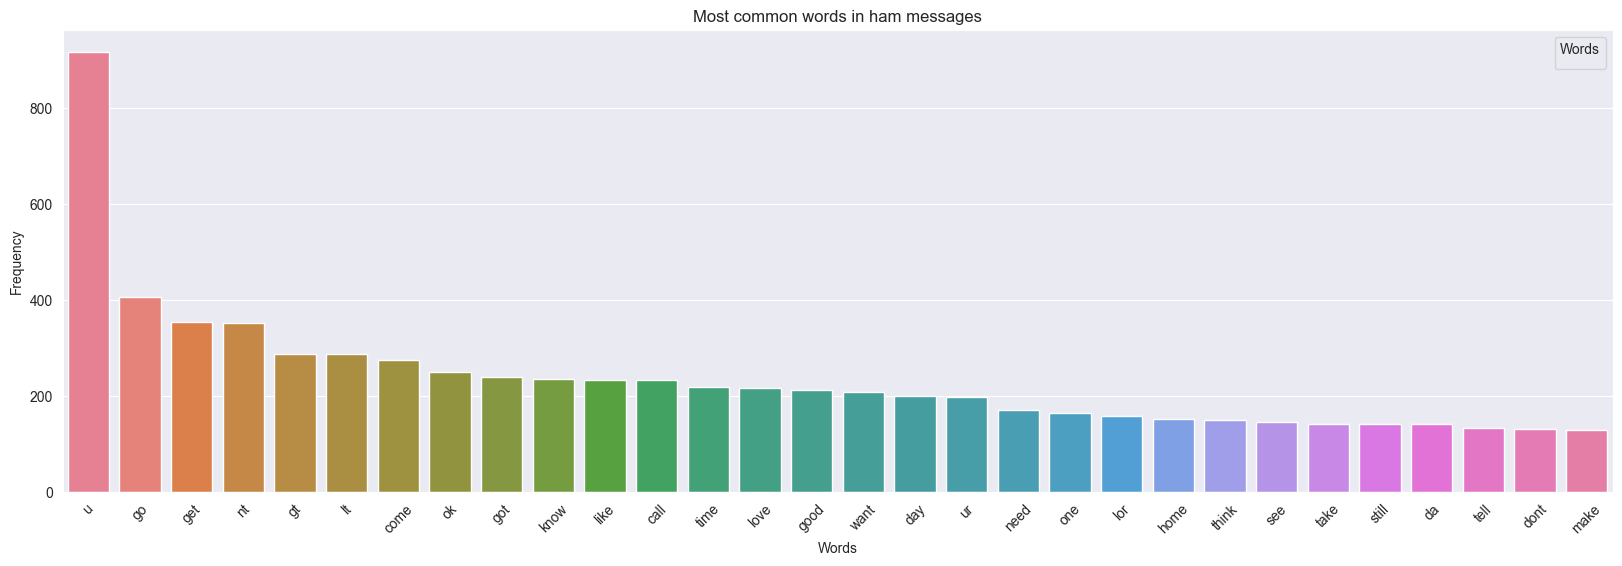

In [122]:
sns.set_style('darkgrid')
counter = Counter(ham_corpus)
plt.figure(figsize=(20, 6))
ax = sns.barplot(x=[item[0] for item in counter.most_common(30)],
                 y=[item[1] for item in counter.most_common(30)],
                 hue=[item[0] for item in counter.most_common(30)],  # Use words for hue
                 palette="husl",  # Use a color palette with enough colors
                 dodge=False)  # Prevent grouping of bars
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most common words in ham messages')
plt.xticks(rotation=45)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='upper right', title="Words") # Manually add the legend
plt.show()

## 1.3.) BoW and N-grams

In [123]:
# Tokenize the text into words for each document
df['bow_unigram'] = df['text'].apply(lambda x: list(set(x.split())))

In [124]:
from nltk import bigrams
df['bow_bigram'] = df['text'].apply(lambda x: list(bigrams(x.split())))

In [125]:
from nltk import trigrams
df['bow_trigram'] = df['text'].apply(lambda x: list(trigrams(x.split())))

In [126]:
df.head(n=5)

,type,emails,text,word_count,bow_unigram,bow_bigram,bow_trigram
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,20,"[world, point, avail, amor, wat, la, jurong, e...","[(go, jurong), (jurong, point), (point, crazi)...","[(go, jurong, point), (jurong, point, crazi), ..."
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni,6,"[lar, joke, oni, u, ok, wif]","[(ok, lar), (lar, joke), (joke, wif), (wif, u)...","[(ok, lar, joke), (lar, joke, wif), (joke, wif..."
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...,28,"[tkt, entri, std, final, fa, text, win, cup, w...","[(free, entri), (entri, wkli), (wkli, comp), (...","[(free, entri, wkli), (entri, wkli, comp), (wk..."
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,11,"[dun, earli, hor, u, alreadi, c, say]","[(u, dun), (dun, say), (say, earli), (earli, h...","[(u, dun, say), (dun, say, earli), (say, earli..."
4,0,"Nah I don't think he goes to usf, he lives aro...",nah nt think goe usf live around though,13,"[live, though, think, usf, nt, nah, goe, around]","[(nah, nt), (nt, think), (think, goe), (goe, u...","[(nah, nt, think), (nt, think, goe), (think, g..."


In [127]:
# Function to encode a BOW column into numeric IDs
def encode_bow_to_numeric(bow_column):
    # Flatten the list of lists to create a full vocabulary
    vocab = set(token for bow in bow_column for token in bow)
    
    # Assign a unique numeric ID to each token in the vocabulary
    token_to_id = {token: idx for idx, token in enumerate(vocab)}
    
    # Replace tokens in the BOW with their numeric IDs
    encoded_bow = bow_column.apply(lambda bow: [token_to_id[token] for token in bow])
    
    return encoded_bow, token_to_id

# Encode unigrams, bigrams, and trigrams
df['bow_unigram_numeric'], unigram_vocab = encode_bow_to_numeric(df['bow_unigram'])
df['bow_bigram_numeric'], bigram_vocab = encode_bow_to_numeric(df['bow_bigram'])
df['bow_trigram_numeric'], trigram_vocab = encode_bow_to_numeric(df['bow_trigram'])

df[['bow_unigram', 'bow_unigram_numeric', 'bow_bigram', 'bow_bigram_numeric', 'bow_trigram', 'bow_trigram_numeric']].head()

,bow_unigram,bow_unigram_numeric,bow_bigram,bow_bigram_numeric,bow_trigram,bow_trigram_numeric
0,"[world, point, avail, amor, wat, la, jurong, e...","[3720, 5356, 3596, 4837, 6105, 966, 2768, 2595...","[(go, jurong), (jurong, point), (point, crazi)...","[6868, 15030, 14286, 18950, 15065, 29742, 2149...","[(go, jurong, point), (jurong, point, crazi), ...","[7427, 5918, 26530, 22652, 26558, 28494, 1386,..."
1,"[lar, joke, oni, u, ok, wif]","[5815, 1129, 4909, 5210, 1852, 4299]","[(ok, lar), (lar, joke), (joke, wif), (wif, u)...","[26547, 3896, 13790, 9479, 23023]","[(ok, lar, joke), (lar, joke, wif), (joke, wif...","[16218, 14429, 9494, 3781]"
2,"[tkt, entri, std, final, fa, text, win, cup, w...","[2092, 5657, 6489, 6512, 4042, 6009, 5094, 322...","[(free, entri), (entri, wkli), (wkli, comp), (...","[2749, 28276, 11196, 17909, 3061, 19494, 18045...","[(free, entri, wkli), (entri, wkli, comp), (wk...","[24244, 2332, 7930, 29206, 20853, 20806, 4867,..."
3,"[dun, earli, hor, u, alreadi, c, say]","[5026, 2948, 4920, 5210, 6215, 4256, 7]","[(u, dun), (dun, say), (say, earli), (earli, h...","[19089, 5756, 22323, 23618, 2401, 1341, 2177, ...","[(u, dun, say), (dun, say, earli), (say, earli...","[2065, 20259, 9342, 13567, 32, 26299, 17037]"
4,"[live, though, think, usf, nt, nah, goe, around]","[6291, 4044, 1242, 1687, 1635, 2076, 4615, 3283]","[(nah, nt), (nt, think), (think, goe), (goe, u...","[19202, 8293, 21844, 3170, 7918, 28601, 24045]","[(nah, nt, think), (nt, think, goe), (think, g...","[13867, 5848, 4255, 23737, 14133, 24079]"


In [128]:
df.head(n=5)

,type,emails,text,word_count,bow_unigram,bow_bigram,bow_trigram,bow_unigram_numeric,bow_bigram_numeric,bow_trigram_numeric
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,20,"[world, point, avail, amor, wat, la, jurong, e...","[(go, jurong), (jurong, point), (point, crazi)...","[(go, jurong, point), (jurong, point, crazi), ...","[3720, 5356, 3596, 4837, 6105, 966, 2768, 2595...","[6868, 15030, 14286, 18950, 15065, 29742, 2149...","[7427, 5918, 26530, 22652, 26558, 28494, 1386,..."
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni,6,"[lar, joke, oni, u, ok, wif]","[(ok, lar), (lar, joke), (joke, wif), (wif, u)...","[(ok, lar, joke), (lar, joke, wif), (joke, wif...","[5815, 1129, 4909, 5210, 1852, 4299]","[26547, 3896, 13790, 9479, 23023]","[16218, 14429, 9494, 3781]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...,28,"[tkt, entri, std, final, fa, text, win, cup, w...","[(free, entri), (entri, wkli), (wkli, comp), (...","[(free, entri, wkli), (entri, wkli, comp), (wk...","[2092, 5657, 6489, 6512, 4042, 6009, 5094, 322...","[2749, 28276, 11196, 17909, 3061, 19494, 18045...","[24244, 2332, 7930, 29206, 20853, 20806, 4867,..."
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,11,"[dun, earli, hor, u, alreadi, c, say]","[(u, dun), (dun, say), (say, earli), (earli, h...","[(u, dun, say), (dun, say, earli), (say, earli...","[5026, 2948, 4920, 5210, 6215, 4256, 7]","[19089, 5756, 22323, 23618, 2401, 1341, 2177, ...","[2065, 20259, 9342, 13567, 32, 26299, 17037]"
4,0,"Nah I don't think he goes to usf, he lives aro...",nah nt think goe usf live around though,13,"[live, though, think, usf, nt, nah, goe, around]","[(nah, nt), (nt, think), (think, goe), (goe, u...","[(nah, nt, think), (nt, think, goe), (think, g...","[6291, 4044, 1242, 1687, 1635, 2076, 4615, 3283]","[19202, 8293, 21844, 3170, 7918, 28601, 24045]","[13867, 5848, 4255, 23737, 14133, 24079]"


# <b> 2. Train a binary classifier (e.g., Logistic Regression, SVM, KNN)

<b> `df['text'] as predictor`

In [178]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

X = df['text']
y = df['type']

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
X_train

4443                          come back tampa ffffuuuuuuu
982     congrat mobil g videophon r call videochat wid...
3822    pleas protect ethreat sib never ask sensit inf...
3924                               nt enough troubl sleep
4927            hope wasnt piss rememb gone sister someth
                              ...                        
806                  sure make sure know ai nt smokin yet
990                                               th juli
1723    hi jon pete ive bin spain recent hav sum diner...
3519                                 reach tell dont know
1745    im cool ta luv vtire caus doin load plan wk go...
Name: text, Length: 4135, dtype: object

In [180]:
y_train

4443    0
982     1
3822    0
3924    0
4927    0
       ..
806     0
990     0
1723    0
3519    0
1745    0
Name: type, Length: 4135, dtype: int32

In [181]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer with corrected parameters
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

# Fit and transform the training and test data
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# Convert y_train and y_test to integers
y_train = y_train.astype('int')
y_test = y_test.astype('int')


In [182]:
# Logistic Regression
lr = LogisticRegression().fit(X_train_features, y_train)
lr_accuracy = accuracy_score(y_test, lr.predict(X_test_features))
print(f"Logistic Regression Accuracy: {lr_accuracy}")

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train_features, y_train)
accuracy_knn = accuracy_score(y_test, knn.predict(X_test_features))
print(f"KNN Accuracy: {accuracy_knn}")

# SVM
svm = SVC()
svm.fit(X_train_features, y_train)
svm_accuracy = accuracy_score(y_test, svm.predict(X_test_features))
print(f"SVM Accuracy: {svm_accuracy}")

accuracies0 = [lr_accuracy, accuracy_knn, svm_accuracy]

Logistic Regression Accuracy: 0.9593810444874274
KNN Accuracy: 0.9081237911025145
SVM Accuracy: 0.9738878143133463


#### <b> BoW-Ngrams

In [183]:
df.head(n=2)

,type,emails,text,word_count,bow_unigram,bow_bigram,bow_trigram,bow_unigram_numeric,bow_bigram_numeric,bow_trigram_numeric,bow_unigram_str,bow_bigram_str,bow_trigram_str
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,20,"[world, point, avail, amor, wat, la, jurong, e...","[(go, jurong), (jurong, point), (point, crazi)...","[(go, jurong, point), (jurong, point, crazi), ...","[3720, 5356, 3596, 4837, 6105, 966, 2768, 2595...","[6868, 15030, 14286, 18950, 15065, 29742, 2149...","[7427, 5918, 26530, 22652, 26558, 28494, 1386,...",world point avail amor wat la jurong e cine gr...,go jurong jurong point point crazi crazi avail...,go jurong point jurong point crazi point crazi...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni,6,"[lar, joke, oni, u, ok, wif]","[(ok, lar), (lar, joke), (joke, wif), (wif, u)...","[(ok, lar, joke), (lar, joke, wif), (joke, wif...","[5815, 1129, 4909, 5210, 1852, 4299]","[26547, 3896, 13790, 9479, 23023]","[16218, 14429, 9494, 3781]",lar joke oni u ok wif,ok lar lar joke joke wif wif u u oni,ok lar joke lar joke wif joke wif u wif u oni


In [184]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Ensure bow_unigram, bow_bigram, and bow_trigram are converted to strings
df['bow_unigram_str'] = df['bow_unigram'].apply(lambda x: ' '.join(x))
df['bow_bigram_str'] = df['bow_bigram'].apply(lambda x: ' '.join([' '.join(pair) for pair in x]))
df['bow_trigram_str'] = df['bow_trigram'].apply(lambda x: ' '.join([' '.join(triple) for triple in x]))

# Split the data
X1 = df['bow_unigram_str']
X2 = df['bow_bigram_str']
X3 = df['bow_trigram_str']
y = df['type']  # Assuming 'type' is the label column

# Split for unigrams
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.2, random_state=3)

# Split for bigrams
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=3)

# Split for trigrams
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size=0.2, random_state=3)

# Initialize the TfidfVectorizer
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

# Fit and transform the training and test data for unigrams
X_train_bow_unigram = feature_extraction.fit_transform(X_train1)
X_test_bow_unigram = feature_extraction.transform(X_test1)

# Fit and transform the training and test data for bigrams
X_train_bow_bigram = feature_extraction.fit_transform(X_train2)
X_test_bow_bigram = feature_extraction.transform(X_test2)

# Fit and transform the training and test data for trigrams
X_train_bow_trigram = feature_extraction.fit_transform(X_train3)
X_test_bow_trigram = feature_extraction.transform(X_test3)


### <b> BoW Unigram

Logistic Regression Accuracy: 0.960348162475822
KNN Accuracy: 0.90715667311412
SVM Accuracy: 0.9729206963249516


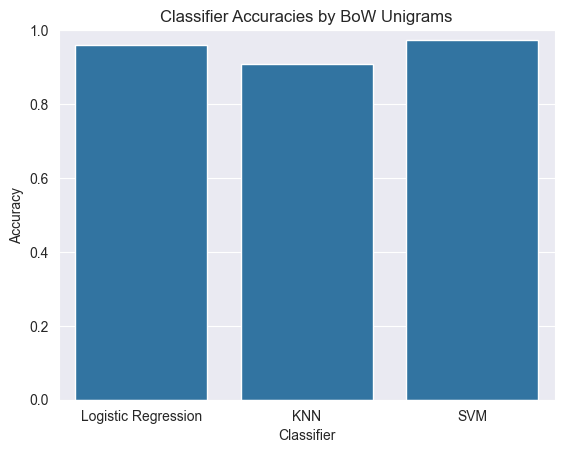

In [185]:
# Logistic Regression
lr = LogisticRegression().fit(X_train_bow_unigram, y_train)
lr_accuracy = accuracy_score(y_test, lr.predict(X_test_bow_unigram))
print(f"Logistic Regression Accuracy: {lr_accuracy}")

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train_bow_unigram, y_train)
accuracy_knn = accuracy_score(y_test, knn.predict(X_test_bow_unigram))
print(f"KNN Accuracy: {accuracy_knn}")

# SVM
svm = SVC()
svm.fit(X_train_bow_unigram, y_train)
svm_accuracy = accuracy_score(y_test, svm.predict(X_test_bow_unigram))
print(f"SVM Accuracy: {svm_accuracy}")

# Visualization
accuracies1 = [lr_accuracy, accuracy_knn, svm_accuracy]
classifiers = ['Logistic Regression', 'KNN', 'SVM']
sns.barplot(x=classifiers, y=accuracies1)
plt.title('Classifier Accuracies by BoW Unigrams')
plt.ylabel('Accuracy')
plt.xlabel('Classifier')
plt.ylim(0, 1)
plt.show()

### <b> BoW Bigrams

Logistic Regression Accuracy: 0.9574468085106383
KNN Accuracy: 0.9090909090909091
SVM Accuracy: 0.9709864603481625


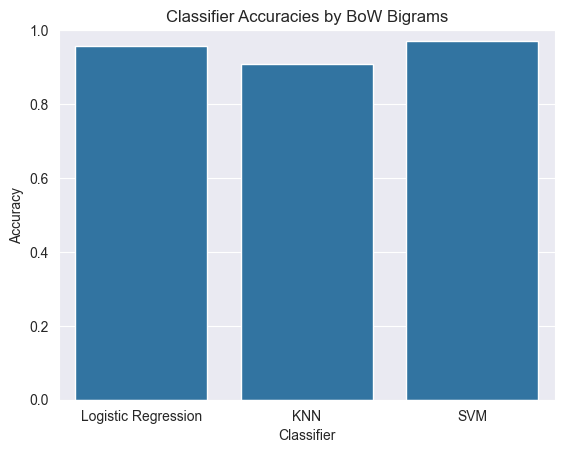

In [186]:
# Logistic Regression
lr = LogisticRegression().fit(X_train_bow_bigram, y_train)
lr_accuracy = accuracy_score(y_test, lr.predict(X_test_bow_bigram))
print(f"Logistic Regression Accuracy: {lr_accuracy}")

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train_bow_bigram, y_train)
accuracy_knn = accuracy_score(y_test, knn.predict(X_test_bow_bigram))
print(f"KNN Accuracy: {accuracy_knn}")

# SVM
svm = SVC()
svm.fit(X_train_bow_bigram, y_train)
svm_accuracy = accuracy_score(y_test, svm.predict(X_test_bow_bigram))
print(f"SVM Accuracy: {svm_accuracy}")

# Visualization
accuracies2 = [lr_accuracy, accuracy_knn, svm_accuracy]
classifiers = ['Logistic Regression', 'KNN', 'SVM']
sns.barplot(x=classifiers, y=accuracies2)
plt.title('Classifier Accuracies by BoW Bigrams')
plt.ylabel('Accuracy')
plt.xlabel('Classifier')
plt.ylim(0, 1)
plt.show()

### <b> BoW Trigrams

Logistic Regression Accuracy: 0.9555125725338491
KNN Accuracy: 0.9100580270793037
SVM Accuracy: 0.9738878143133463


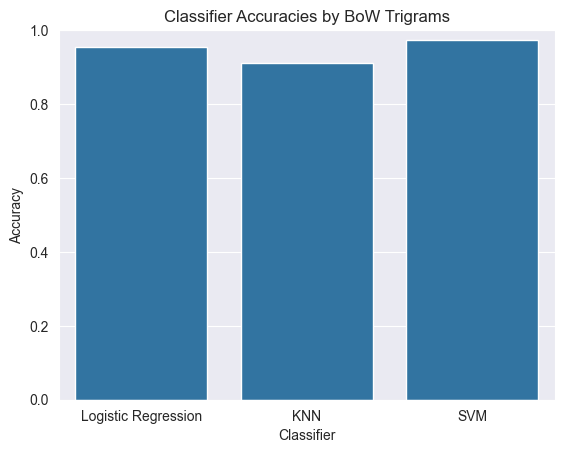

In [187]:
# Logistic Regression
lr = LogisticRegression().fit(X_train_bow_trigram, y_train)
lr_accuracy = accuracy_score(y_test, lr.predict(X_test_bow_trigram))
print(f"Logistic Regression Accuracy: {lr_accuracy}")

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train_bow_trigram, y_train)
accuracy_knn = accuracy_score(y_test, knn.predict(X_test_bow_trigram))
print(f"KNN Accuracy: {accuracy_knn}")

# SVM
svm = SVC()
svm.fit(X_train_bow_trigram, y_train)
svm_accuracy = accuracy_score(y_test, svm.predict(X_test_bow_trigram))
print(f"SVM Accuracy: {svm_accuracy}")

# Visualization
accuracies3 = [lr_accuracy, accuracy_knn, svm_accuracy]
classifiers = ['Logistic Regression', 'KNN', 'SVM']
sns.barplot(x=classifiers, y=accuracies3)
plt.title('Classifier Accuracies by BoW Trigrams')
plt.ylabel('Accuracy')
plt.xlabel('Classifier')
plt.ylim(0, 1)
plt.show()

In [188]:
accuracies0, accuracies1, accuracies2, accuracies3

([0.9593810444874274, 0.9081237911025145, 0.9738878143133463],
 [0.960348162475822, 0.90715667311412, 0.9729206963249516],
 [0.9574468085106383, 0.9090909090909091, 0.9709864603481625],
 [0.9555125725338491, 0.9100580270793037, 0.9738878143133463])

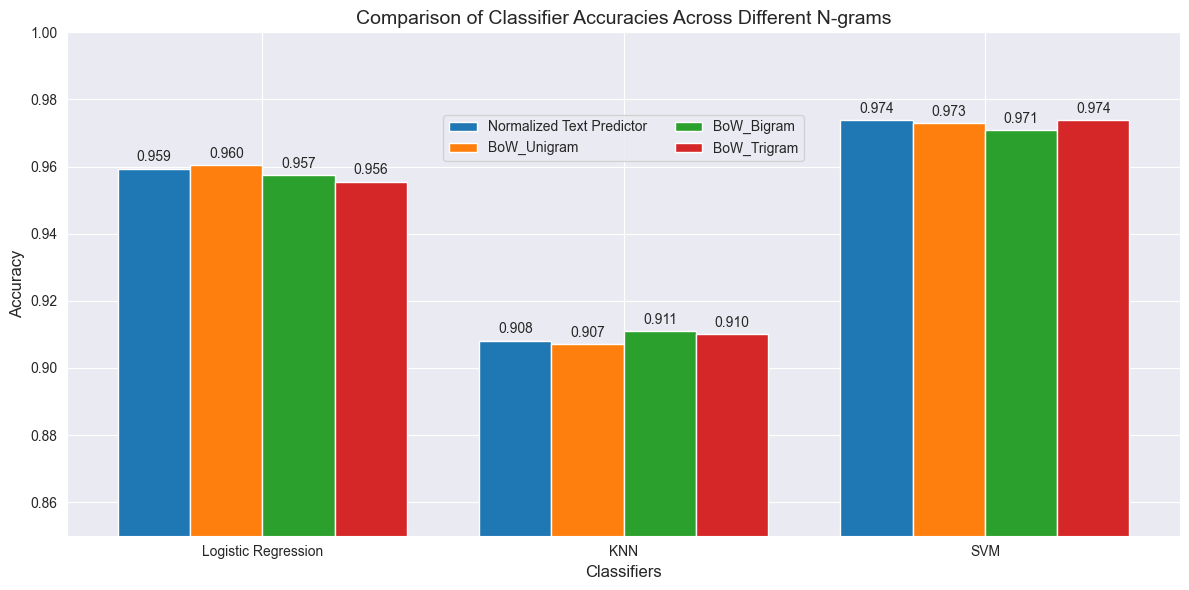

In [189]:
import matplotlib.pyplot as plt
import numpy as np

classifiers = ['Logistic Regression', 'KNN', 'SVM']
accuracies0 = [0.9593810444874274, 0.9081237911025145, 0.9738878143133463]
accuracies1 = [0.960348162475822, 0.90715667311412, 0.9729206963249516]
accuracies2 = [0.9574468085106383, 0.9110251450676983, 0.9709864603481625]
accuracies3 = [0.9555125725338491, 0.9100580270793037, 0.9738878143133463]

# Grouped Bar Chart
x = np.arange(len(classifiers))  # the label locations
width = 0.2  # the width of the bars
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting bars
bars0 = ax.bar(x - 1.5 * width, accuracies0, width, label='Normalized Text Predictor')
bars1 = ax.bar(x - 0.5 * width, accuracies1, width, label='BoW_Unigram')
bars2 = ax.bar(x + 0.5 * width, accuracies2, width, label='BoW_Bigram')
bars3 = ax.bar(x + 1.5 * width, accuracies3, width, label='BoW_Trigram')

# Add labels, title, and legend
ax.set_xlabel('Classifiers', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Comparison of Classifier Accuracies Across Different N-grams', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(classifiers)
ax.set_ylim(0.85, 1)  # Set accuracy range
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.85), ncol=2, fontsize=10)  # Position legend at the top center

# Adding accuracy values on top of the bars
for bars in [bars0, bars1, bars2, bars3]:
    ax.bar_label(bars, fmt='%.3f', padding=3)

plt.tight_layout()
plt.show()


# <b> 3. Fine-tune hyperparameters to improve model performance.

## 3.1.) Logistic Regression

In [190]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

def train_logistic_regression_solvers(X_train, X_test, y_train, y_test, max_iter=3000):

    # Define models with different solvers
    models = [
        LogisticRegression(solver='newton-cg', penalty='l2', max_iter=max_iter),
        LogisticRegression(solver='lbfgs', penalty='l2', max_iter=max_iter),
        LogisticRegression(solver='sag', penalty='l2', max_iter=max_iter),
        LogisticRegression(solver='saga', penalty='l2', max_iter=max_iter)
    ]
    
    # DataFrame to store results
    clf_compare = pd.DataFrame(columns=['Solver', 'Train Accuracy', 'Test Accuracy'])

    # Train and evaluate each model
    for model in models:
        try:
            # Train the model
            model.fit(X_train, y_train)

            # Append results using pd.concat
            new_row = pd.DataFrame([{
                'Solver': model.solver,
                'Train Accuracy': round(model.score(X_train, y_train), 5),
                'Test Accuracy': round(model.score(X_test, y_test), 5)
            }])
            clf_compare = pd.concat([clf_compare, new_row], ignore_index=True)
        except Exception as e:
            print(f"Solver {model.solver} failed with error: {e}")

    # Sort by Test Accuracy
    clf_compare.sort_values(by='Test Accuracy', ascending=False, inplace=True)
    return clf_compare

# Normalized text predictor
print("==> Normalized text predictor:")
clf_compare_normalized = train_logistic_regression_solvers(X_train_features, X_test_features, y_train, y_test)
print(clf_compare_normalized)

# BoW Unigram predictor
print("\n==> BoW Unigram predictor:")
clf_compare_bow_uni = train_logistic_regression_solvers(X_train_bow_unigram, X_test_bow_unigram, y_train, y_test)
print(clf_compare_bow_uni)

# BoW Bigram predictor
print("\n==> BoW Bigram predictor:")
clf_compare_bow_bi = train_logistic_regression_solvers(X_train_bow_bigram, X_test_bow_bigram, y_train, y_test)
print(clf_compare_bow_bi)

# BoW Trigram predictor
print("\n==> BoW Trigram predictor:")
clf_compare_bow_tri = train_logistic_regression_solvers(X_train_bow_trigram, X_test_bow_trigram, y_train, y_test)
print(clf_compare_bow_tri)


==> Normalized text predictor:
      Solver  Train Accuracy  Test Accuracy
0  newton-cg         0.96155        0.95938
1      lbfgs         0.96155        0.95938
2        sag         0.96155        0.95938
3       saga         0.96179        0.95938

==> BoW Unigram predictor:
      Solver  Train Accuracy  Test Accuracy
0  newton-cg         0.96203        0.96035
1      lbfgs         0.96227        0.96035
2        sag         0.96203        0.96035
3       saga         0.96227        0.96035

==> BoW Bigram predictor:
      Solver  Train Accuracy  Test Accuracy
0  newton-cg         0.96155        0.95745
1      lbfgs         0.96179        0.95745
2        sag         0.96155        0.95745
3       saga         0.96203        0.95745

==> BoW Trigram predictor:


C:\Users\Rog Strix\AppData\Local\Temp\ipykernel_5276\418539565.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  clf_compare = pd.concat([clf_compare, new_row], ignore_index=True)
C:\Users\Rog Strix\AppData\Local\Temp\ipykernel_5276\418539565.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  clf_compare = pd.concat([clf_compare, new_row], ignore_index=True)
C:\Users\Rog Strix\AppData\Local\Temp\ipykernel_5276\418539565.py:29: FutureWarning: The behavior of DataFrame concatenation with empt

      Solver  Train Accuracy  Test Accuracy
0  newton-cg         0.96034        0.95648
2        sag         0.96034        0.95648
3       saga         0.96082        0.95648
1      lbfgs         0.96058        0.95551


In [191]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import joblib  # Importing joblib for model saving

def train_logistic_regression_solvers(X_train, X_test, y_train, y_test, max_iter=3000, save_model=False):

    # Define models with different solvers
    models = [
        LogisticRegression(solver='newton-cg', penalty='l2', C=0.001, max_iter=max_iter),
        LogisticRegression(solver='lbfgs', penalty='l2', C=0.001, max_iter=max_iter),
        LogisticRegression(solver='sag', penalty='l2', C=0.001, max_iter=max_iter),
        LogisticRegression(solver='saga', penalty='l2', C=0.001, max_iter=max_iter)
    ]
    
    # DataFrame to store results
    clf_compare = pd.DataFrame(columns=['Solver', 'Train Accuracy', 'Test Accuracy'])

    # Train and evaluate each model
    for model in models:
        try:
            # Train the model
            model.fit(X_train, y_train)

            # Append results using pd.concat
            new_row = pd.DataFrame([{
                'Solver': model.solver,
                'Train Accuracy': round(model.score(X_train, y_train), 5),
                'Test Accuracy': round(model.score(X_test, y_test), 5)
            }])
            clf_compare = pd.concat([clf_compare, new_row], ignore_index=True)

            # Save the trained model
            if save_model:
                model_filename = f"logistic_regression_{model.solver}.pkl"
                joblib.dump(model, model_filename)
                print(f"Model saved as {model_filename}")
        except Exception as e:
            print(f"Solver {model.solver} failed with error: {e}")

    # Sort by Test Accuracy
    clf_compare.sort_values(by='Test Accuracy', ascending=False, inplace=True)
    return clf_compare

# Normalized text predictor
print("==> Normalized text predictor:")
clf_compare_normalized = train_logistic_regression_solvers(X_train_features, X_test_features, y_train, y_test, save_model=True)
print(clf_compare_normalized)

# BoW Unigram predictor
print("\n==> BoW Unigram predictor:")
clf_compare_bow_uni = train_logistic_regression_solvers(X_train_bow_unigram, X_test_bow_unigram, y_train, y_test, save_model=True)
print(clf_compare_bow_uni)

# BoW Bigram predictor
print("\n==> BoW Bigram predictor:")
clf_compare_bow_bi = train_logistic_regression_solvers(X_train_bow_bigram, X_test_bow_bigram, y_train, y_test, save_model=True)
print(clf_compare_bow_bi)

# BoW Trigram predictor
print("\n==> BoW Trigram predictor:")
clf_compare_bow_tri = train_logistic_regression_solvers(X_train_bow_trigram, X_test_bow_trigram, y_train, y_test, save_model=True)
print(clf_compare_bow_tri)


==> Normalized text predictor:
Model saved as logistic_regression_newton-cg.pkl
Model saved as logistic_regression_lbfgs.pkl
Model saved as logistic_regression_sag.pkl
Model saved as logistic_regression_saga.pkl
      Solver  Train Accuracy  Test Accuracy
0  newton-cg         0.87594         0.8646
1      lbfgs         0.87594         0.8646
2        sag         0.87594         0.8646
3       saga         0.87594         0.8646

==> BoW Unigram predictor:
Model saved as logistic_regression_newton-cg.pkl
Model saved as logistic_regression_lbfgs.pkl
Model saved as logistic_regression_sag.pkl


C:\Users\Rog Strix\AppData\Local\Temp\ipykernel_5276\3878830084.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  clf_compare = pd.concat([clf_compare, new_row], ignore_index=True)
C:\Users\Rog Strix\AppData\Local\Temp\ipykernel_5276\3878830084.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  clf_compare = pd.concat([clf_compare, new_row], ignore_index=True)


Model saved as logistic_regression_saga.pkl
      Solver  Train Accuracy  Test Accuracy
0  newton-cg         0.87594         0.8646
1      lbfgs         0.87594         0.8646
2        sag         0.87594         0.8646
3       saga         0.87594         0.8646

==> BoW Bigram predictor:
Model saved as logistic_regression_newton-cg.pkl
Model saved as logistic_regression_lbfgs.pkl
Model saved as logistic_regression_sag.pkl
Model saved as logistic_regression_saga.pkl
      Solver  Train Accuracy  Test Accuracy
0  newton-cg         0.87594         0.8646
1      lbfgs         0.87594         0.8646
2        sag         0.87594         0.8646
3       saga         0.87594         0.8646

==> BoW Trigram predictor:
Model saved as logistic_regression_newton-cg.pkl
Model saved as logistic_regression_lbfgs.pkl


C:\Users\Rog Strix\AppData\Local\Temp\ipykernel_5276\3878830084.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  clf_compare = pd.concat([clf_compare, new_row], ignore_index=True)
C:\Users\Rog Strix\AppData\Local\Temp\ipykernel_5276\3878830084.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  clf_compare = pd.concat([clf_compare, new_row], ignore_index=True)


Model saved as logistic_regression_sag.pkl
Model saved as logistic_regression_saga.pkl
      Solver  Train Accuracy  Test Accuracy
0  newton-cg         0.87594         0.8646
1      lbfgs         0.87594         0.8646
2        sag         0.87594         0.8646
3       saga         0.87594         0.8646


## 3.2.) K-Nearest Neighbour

In [193]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import joblib  # To save the model

# Step 2: Set up K-Fold cross-validation with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 3: Define the parameter grid for the number of neighbors
param_grid = {'n_neighbors': np.arange(2, 30, 1)}

# Step 4: Initialize the K-Nearest Neighbors classifier
knn = KNeighborsClassifier()

# Step 5: Set up GridSearchCV for hyperparameter tuning
knn_cv = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=kf,
    verbose=1,  # Increase verbosity to track progress
    scoring='accuracy'  # Evaluate models based on accuracy
)

# Step 6: Fit the GridSearchCV to the transformed training data
knn_cv.fit(X_train_features, y_train)

# Output the best parameters and their corresponding score
print("Best Parameters:", knn_cv.best_params_)
print("Best Cross-Validation Accuracy:", knn_cv.best_score_)

# Step 7: Save the best model with the best hyperparameters
best_model = knn_cv.best_estimator_

# Save the best model using joblib
joblib.dump(best_model, 'best_knn_model.pkl')
print("Best KNN model saved as 'best_knn_model.pkl'")


Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best Parameters: {'n_neighbors': 3}
Best Cross-Validation Accuracy: 0.916565900846433
Best KNN model saved as 'best_knn_model.pkl'


In [194]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

train_score = []
test_score = []

n_neighbors = np.arange(2, 50, 1)

for neighbor in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train_features, y_train)
    
    train_score.append(knn.score(X_train_features, y_train))
    test_score.append(knn.score(X_test_features, y_test))

knn_result2 = pd.DataFrame(
    {
        'n_neighbors': n_neighbors,
        'train_score': train_score,
        'test_score': test_score
    }
)

knn_result2


,n_neighbors,train_score,test_score
0,2,0.942684,0.918762
1,3,0.942684,0.918762
2,4,0.923579,0.907157
3,5,0.924063,0.908124
4,6,0.911487,0.890716
5,7,0.911487,0.890716
6,8,0.899395,0.879110
7,9,0.899395,0.879110
8,10,0.891415,0.873308
9,11,0.891415,0.873308


> Therefore, the best parameter is : {'n_neighbors': 3} with n_splits = 5 of KFold-cross validation.

### 3.3.) SVM

In [145]:
degreeG = [0, 1, 6]
cSetG = [0.1, 1, 10]
gammaG = [0.1, 1, 10]
kernelsG = ['linear', 'rbf', 'poly']

In [146]:
from sklearn.model_selection import GridSearchCV
model = SVC()
gridSearch = GridSearchCV(estimator=model,param_grid={'degree':degreeG,'kernel':kernelsG,'C':cSetG,'gamma':gammaG},cv=4)
gridSearch.fit(X_train_features, y_train)
print(f'The best parameter is {gridSearch.best_params_}')
print(f'The best score is {gridSearch.best_score_}')
print(f'The best estimator is {gridSearch.best_estimator_}')

The best parameter is {'C': 10, 'degree': 0, 'gamma': 0.1, 'kernel': 'rbf'}
The best score is 0.9733984039276411
The best estimator is SVC(C=10, degree=0, gamma=0.1)


In [147]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Use the best parameters obtained from GridSearchCV
best_model = SVC(C=10, degree=0, gamma=0.1, kernel='rbf')

# Train the model on the training data
best_model.fit(X_train_features, y_train)

# Make predictions on the test data
y_pred = best_model.predict(X_test_features)

# Evaluate the model's performance
train_accuracy = best_model.score(X_train_features, y_train)
test_accuracy = accuracy_score(y_test, y_pred)

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 0.9987908101571947
Test Accuracy: 0.9825918762088974


# <b> 4. Explain results using metrics like confusion matrix, ROC-AUC.

==> Normalized text predictor:


C:\Users\Rog Strix\AppData\Local\Temp\ipykernel_5276\2316789004.py:55: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  clf_compare = pd.concat([clf_compare, new_row], ignore_index=True)


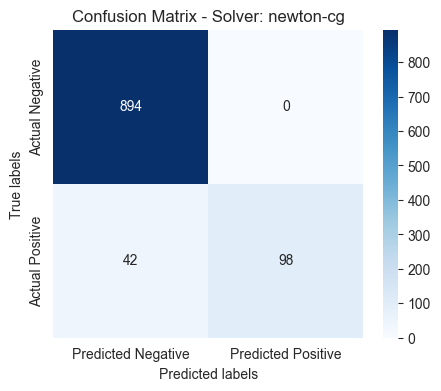

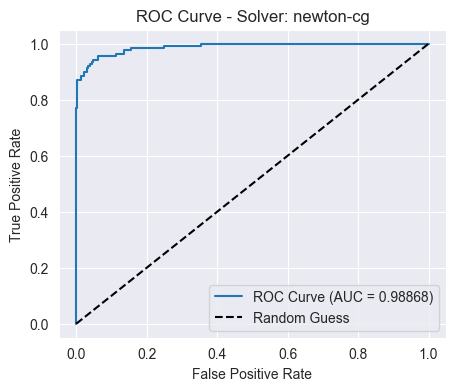

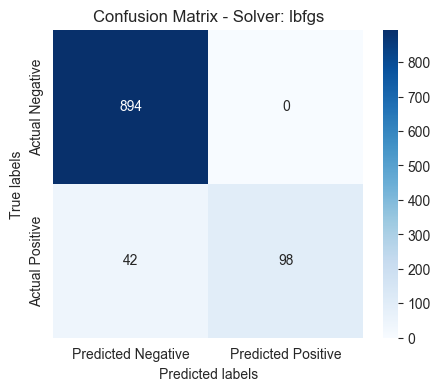

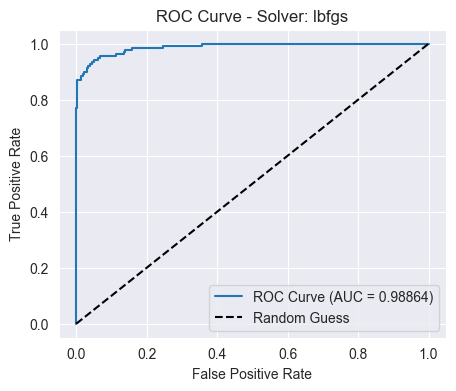

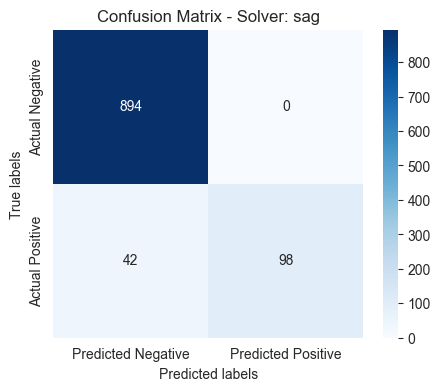

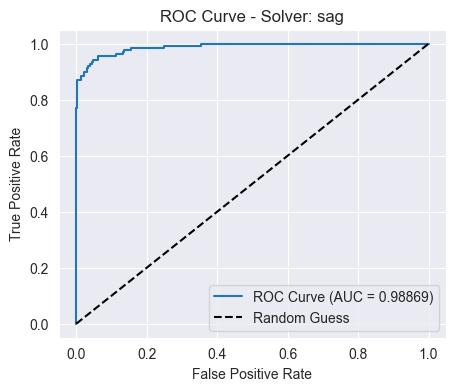

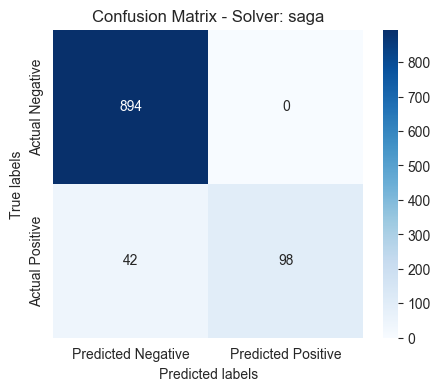

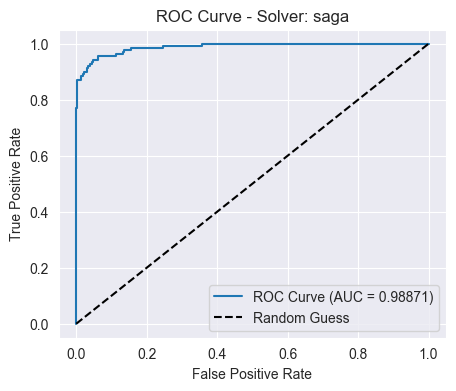

      Solver  Train Accuracy  Test Accuracy  Precision   Recall  F1-Score  \
0  newton-cg         0.96155        0.95938     0.9612  0.95938   0.95626   
1      lbfgs         0.96155        0.95938     0.9612  0.95938   0.95626   
2        sag         0.96155        0.95938     0.9612  0.95938   0.95626   
3       saga         0.96179        0.95938     0.9612  0.95938   0.95626   

   ROC AUC  
0  0.98868  
1  0.98864  
2  0.98869  
3  0.98871  

==> BoW Unigram predictor:


C:\Users\Rog Strix\AppData\Local\Temp\ipykernel_5276\2316789004.py:55: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  clf_compare = pd.concat([clf_compare, new_row], ignore_index=True)


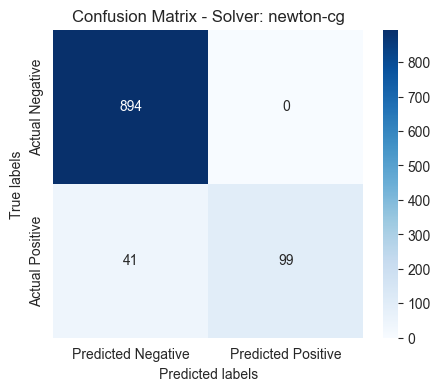

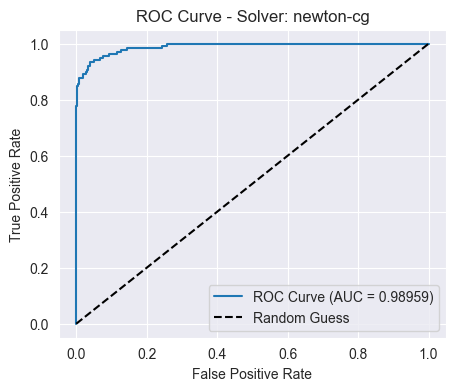

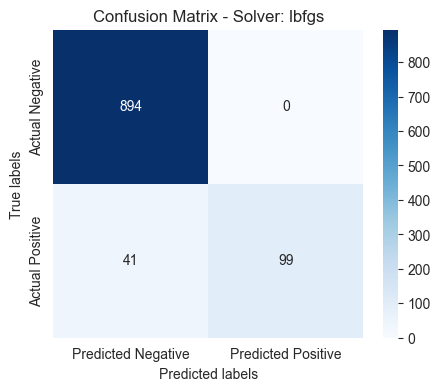

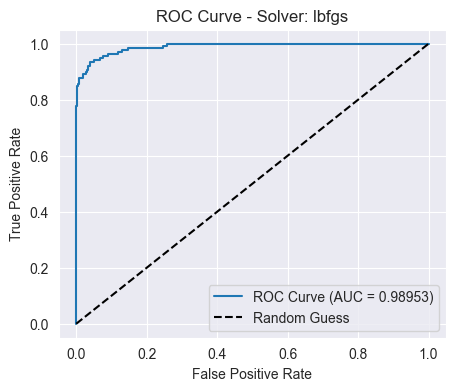

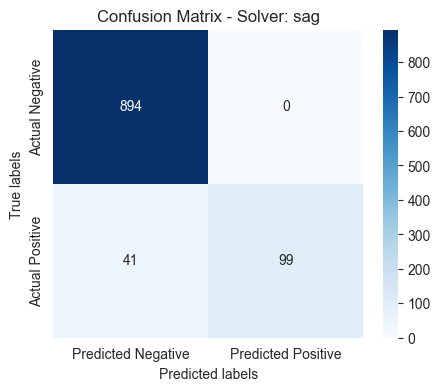

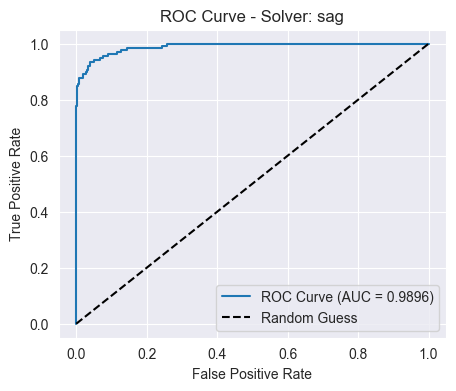

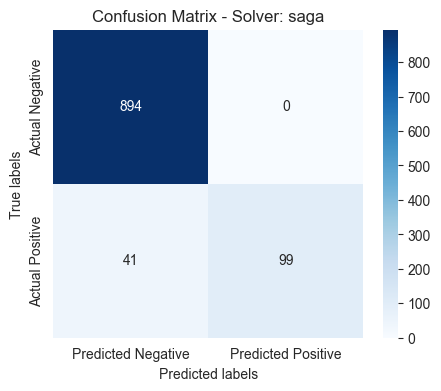

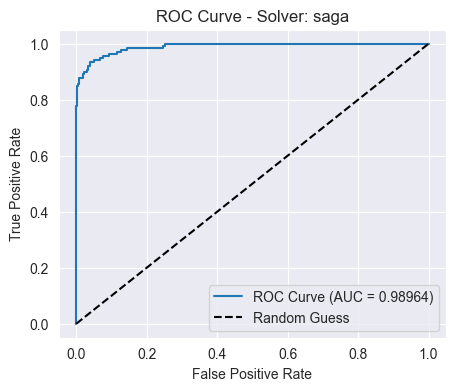

      Solver  Train Accuracy  Test Accuracy  Precision   Recall  F1-Score  \
0  newton-cg         0.96203        0.96035    0.96209  0.96035   0.95739   
1      lbfgs         0.96227        0.96035    0.96209  0.96035   0.95739   
2        sag         0.96203        0.96035    0.96209  0.96035   0.95739   
3       saga         0.96227        0.96035    0.96209  0.96035   0.95739   

   ROC AUC  
0  0.98959  
1  0.98953  
2  0.98960  
3  0.98964  

==> BoW Bigram predictor:


C:\Users\Rog Strix\AppData\Local\Temp\ipykernel_5276\2316789004.py:55: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  clf_compare = pd.concat([clf_compare, new_row], ignore_index=True)


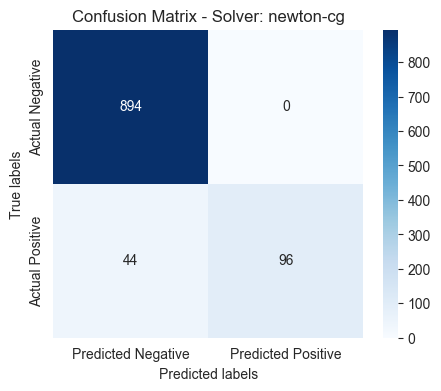

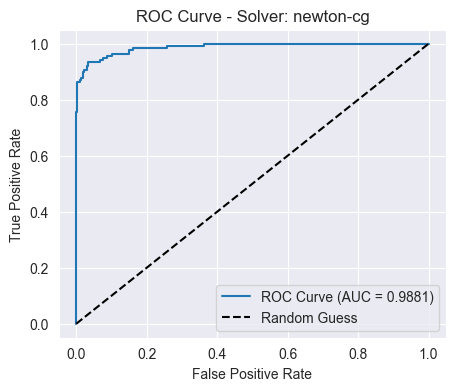

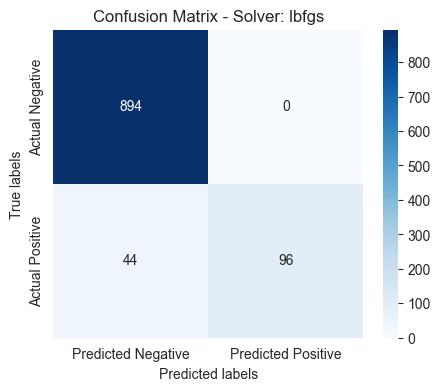

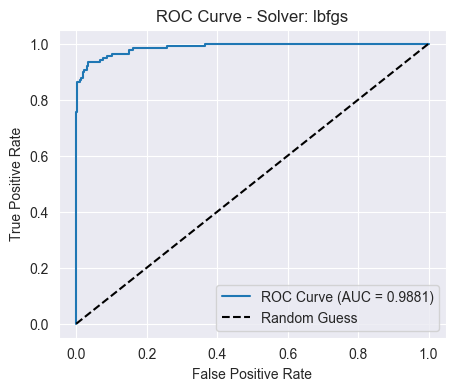

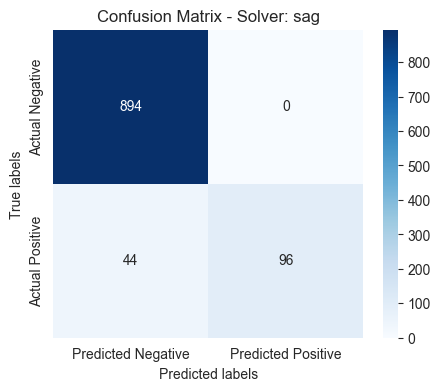

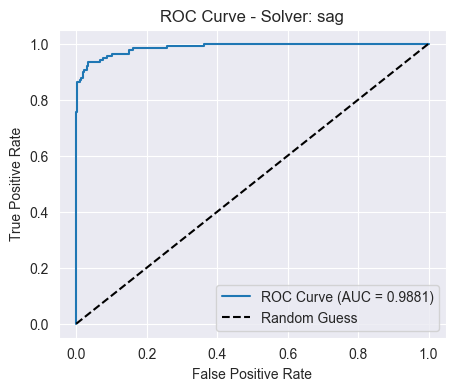

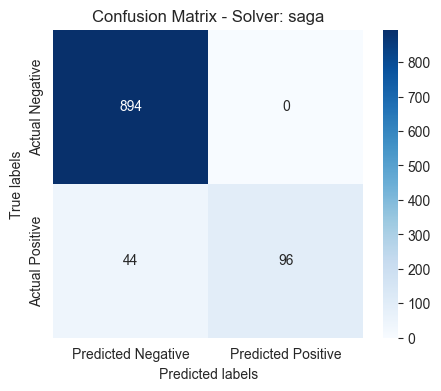

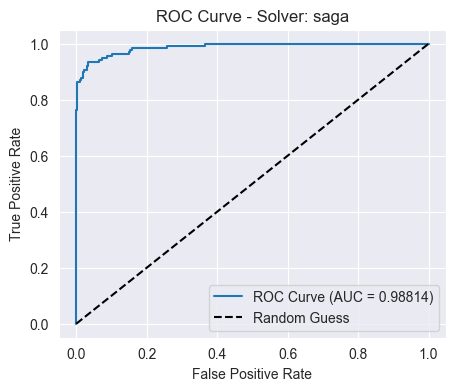

      Solver  Train Accuracy  Test Accuracy  Precision   Recall  F1-Score  \
0  newton-cg         0.96155        0.95745    0.95944  0.95745   0.95399   
1      lbfgs         0.96179        0.95745    0.95944  0.95745   0.95399   
2        sag         0.96155        0.95745    0.95944  0.95745   0.95399   
3       saga         0.96203        0.95745    0.95944  0.95745   0.95399   

   ROC AUC  
0  0.98810  
1  0.98810  
2  0.98810  
3  0.98814  

==> BoW Trigram predictor:


C:\Users\Rog Strix\AppData\Local\Temp\ipykernel_5276\2316789004.py:55: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  clf_compare = pd.concat([clf_compare, new_row], ignore_index=True)


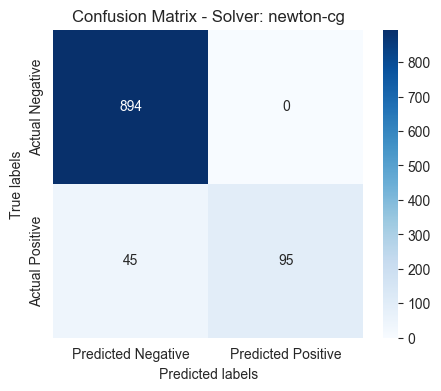

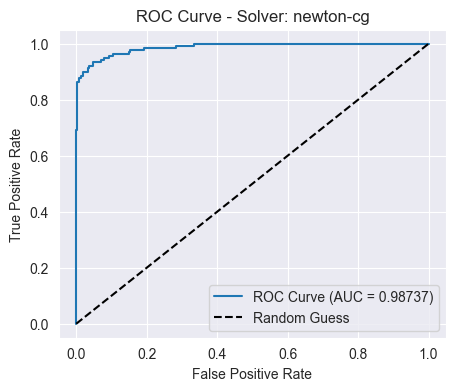

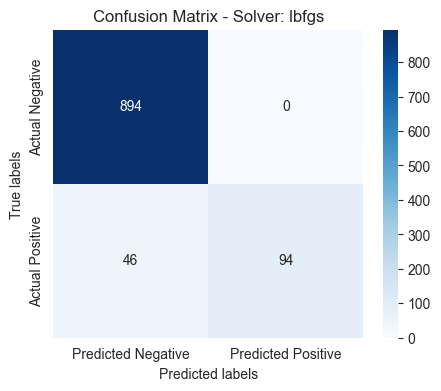

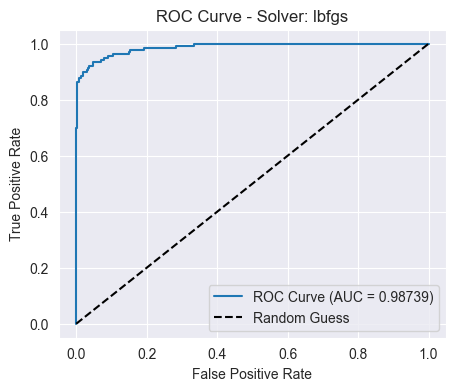

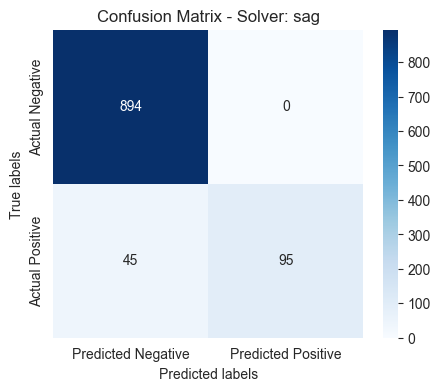

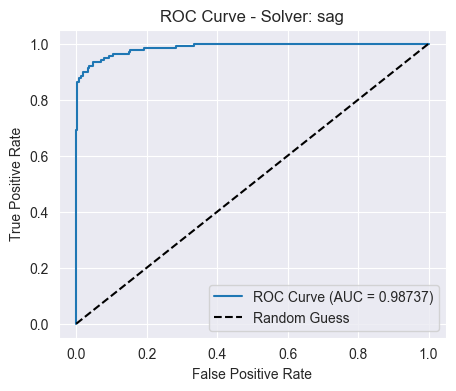

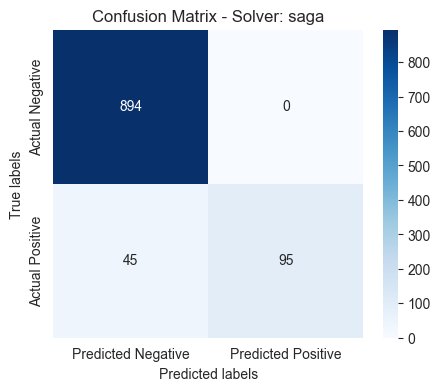

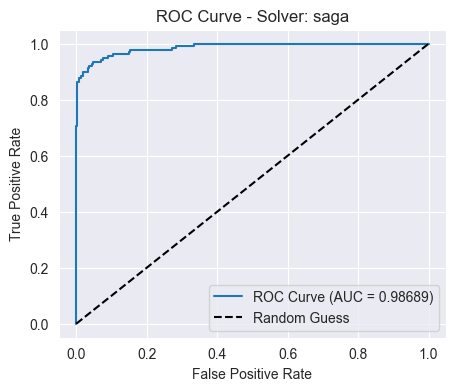

      Solver  Train Accuracy  Test Accuracy  Precision   Recall  F1-Score  \
0  newton-cg         0.96034        0.95648    0.95857  0.95648   0.95285   
2        sag         0.96034        0.95648    0.95857  0.95648   0.95285   
3       saga         0.96058        0.95648    0.95857  0.95648   0.95285   
1      lbfgs         0.96058        0.95551    0.95769  0.95551   0.95170   

   ROC AUC  
0  0.98737  
2  0.98737  
3  0.98689  
1  0.98739  


In [148]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix,
    precision_recall_curve,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score
)

def train_logistic_regression_solvers_with_metrics_and_confusion_matrix(X_train, X_test, y_train, y_test, max_iter=3000):

    # Define models with different solvers
    models = [
        LogisticRegression(solver='newton-cg', penalty='l2', max_iter=max_iter),
        LogisticRegression(solver='lbfgs', penalty='l2', max_iter=max_iter),
        LogisticRegression(solver='sag', penalty='l2', max_iter=max_iter),
        LogisticRegression(solver='saga', penalty='l2', max_iter=max_iter)
    ]
    
    # DataFrame to store results
    clf_compare = pd.DataFrame(columns=[
        'Solver', 'Train Accuracy', 'Test Accuracy', 
        'Precision', 'Recall', 'F1-Score', 'ROC AUC'
    ])

    # Train and evaluate each model
    for model in models:
        try:
            # Train the model
            model.fit(X_train, y_train)

            # Make predictions
            y_pred = model.predict(X_test)
            y_pred_proba = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for ROC and AUC

            # Calculate metrics
            precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
            recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
            f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
            roc_auc = roc_auc_score(y_test, y_pred_proba)  # AUC Score

            # Append results using pd.concat
            new_row = pd.DataFrame([{
                'Solver': model.solver,
                'Train Accuracy': round(model.score(X_train, y_train), 5),
                'Test Accuracy': round(model.score(X_test, y_test), 5),
                'Precision': round(precision, 5),
                'Recall': round(recall, 5),
                'F1-Score': round(f1, 5),
                'ROC AUC': round(roc_auc, 5)
            }])
            clf_compare = pd.concat([clf_compare, new_row], ignore_index=True)

            # Generate and display confusion matrix
            cm = confusion_matrix(y_test, y_pred)
            plt.figure(figsize=(5, 4))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
                        yticklabels=['Actual Negative', 'Actual Positive'])
            plt.title(f'Confusion Matrix - Solver: {model.solver}')
            plt.xlabel('Predicted labels')
            plt.ylabel('True labels')
            plt.show()

            # Generate and display ROC Curve
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            plt.figure(figsize=(5, 4))
            plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {round(roc_auc, 5)})")
            plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
            plt.title(f'ROC Curve - Solver: {model.solver}')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.legend(loc='lower right')
            plt.show()

        except Exception as e:
            print(f"Solver {model.solver} failed with error: {e}")

    # Sort by Test Accuracy
    clf_compare.sort_values(by='Test Accuracy', ascending=False, inplace=True)
    return clf_compare

# Normalized text predictor
print("==> Normalized text predictor:")
clf_compare_normalized = train_logistic_regression_solvers_with_metrics_and_confusion_matrix(X_train_features, X_test_features, y_train, y_test)
print(clf_compare_normalized)

# BoW Unigram predictor
print("\n==> BoW Unigram predictor:")
clf_compare_bow_uni = train_logistic_regression_solvers_with_metrics_and_confusion_matrix(X_train_bow_unigram, X_test_bow_unigram, y_train, y_test)
print(clf_compare_bow_uni)

# BoW Bigram predictor
print("\n==> BoW Bigram predictor:")
clf_compare_bow_bi = train_logistic_regression_solvers_with_metrics_and_confusion_matrix(X_train_bow_bigram, X_test_bow_bigram, y_train, y_test)
print(clf_compare_bow_bi)

# BoW Trigram predictor
print("\n==> BoW Trigram predictor:")
clf_compare_bow_tri = train_logistic_regression_solvers_with_metrics_and_confusion_matrix(X_train_bow_trigram, X_test_bow_trigram, y_train, y_test)
print(clf_compare_bow_tri)


## K-Nearest Neighbor

==> Normalized Text Predictor:
Accuracy: 0.91876
Precision: 0.92574
Recall: 0.91876
F1-Score: 0.90318
AUC: 0.80290


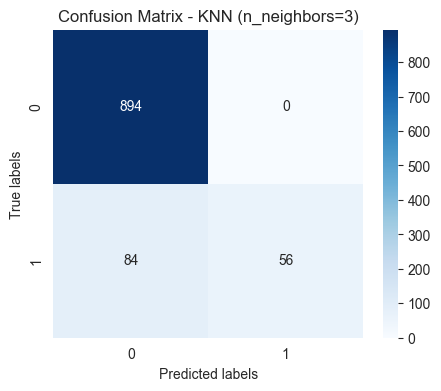

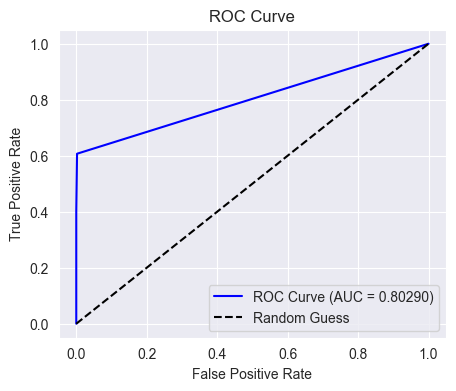


==> BoW Unigram Predictor:
Accuracy: 0.91779
Precision: 0.92493
Recall: 0.91779
F1-Score: 0.90174
AUC: 0.79184


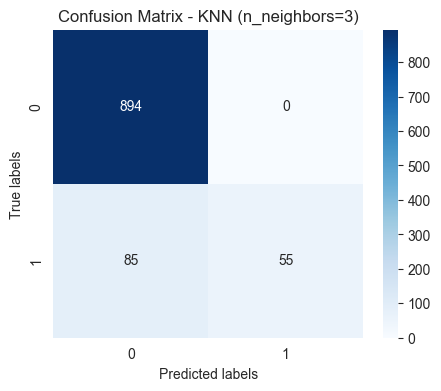

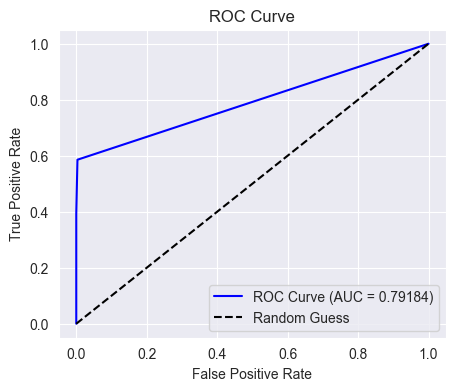


==> BoW Bigram Predictor:
Accuracy: 0.92166
Precision: 0.92817
Recall: 0.92166
F1-Score: 0.90742
AUC: 0.80098


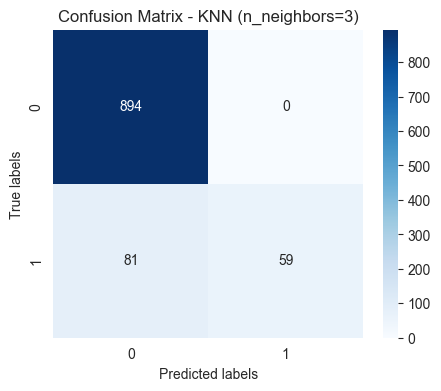

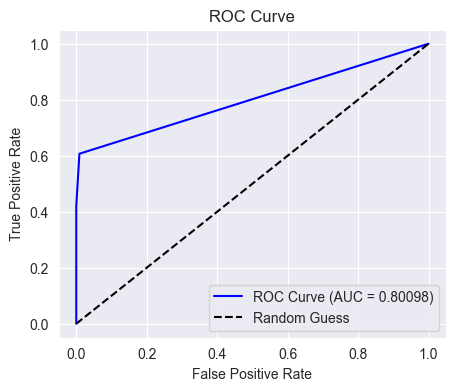


==> BoW Trigram Predictor:
Accuracy: 0.91973
Precision: 0.92499
Recall: 0.91973
F1-Score: 0.90513
AUC: 0.80112


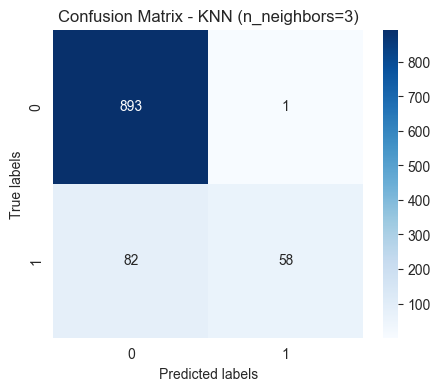

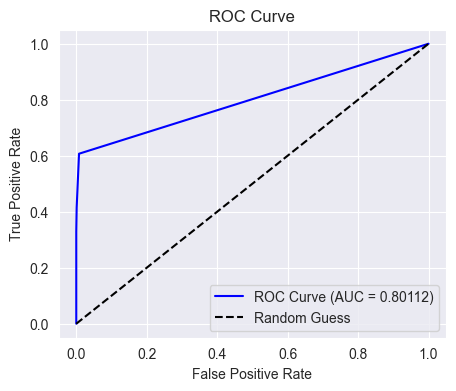

In [149]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt

# Function to train and evaluate KNN with all metrics
def train_knn_with_full_metrics(X_train, X_test, y_train, y_test, n_neighbors=3):
    # Initialize KNN model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Train the model
    knn.fit(X_train, y_train)
    
    # Make predictions
    y_pred = knn.predict(X_test)
    y_proba = knn.predict_proba(X_test)[:, 1] if len(knn.classes_) == 2 else None  # Probability for ROC and AUC
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    auc = roc_auc_score(y_test, y_proba, average='weighted', multi_class='ovr') if y_proba is not None else None
    
    # Print metrics
    print(f"Accuracy: {accuracy:.5f}")
    print(f"Precision: {precision:.5f}")
    print(f"Recall: {recall:.5f}")
    print(f"F1-Score: {f1:.5f}")
    if auc is not None:
        print(f"AUC: {auc:.5f}")
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=knn.classes_, yticklabels=knn.classes_)
    plt.title(f'Confusion Matrix - KNN (n_neighbors={n_neighbors})')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

    # ROC Curve (only for binary classification)
    if y_proba is not None:
        fpr, tpr, thresholds = roc_curve(y_test, y_proba)
        plt.figure(figsize=(5, 4))
        plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.5f})', color='blue')
        plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
        plt.title('ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.show()

# Evaluate for different feature representations
print("==> Normalized Text Predictor:")
train_knn_with_full_metrics(X_train_features, X_test_features, y_train, y_test, n_neighbors=3)

print("\n==> BoW Unigram Predictor:")
train_knn_with_full_metrics(X_train_bow_unigram, X_test_bow_unigram, y_train, y_test, n_neighbors=3)

print("\n==> BoW Bigram Predictor:")
train_knn_with_full_metrics(X_train_bow_bigram, X_test_bow_bigram, y_train, y_test, n_neighbors=3)

print("\n==> BoW Trigram Predictor:")
train_knn_with_full_metrics(X_train_bow_trigram, X_test_bow_trigram, y_train, y_test, n_neighbors=3)


## 3.3.) SVM

==> Normalized Text Predictor:
Model Evaluation Metrics:
Accuracy: 0.98259
Precision: 0.98262
Recall: 0.98259
F1-Score: 0.98220
AUC: 0.99216


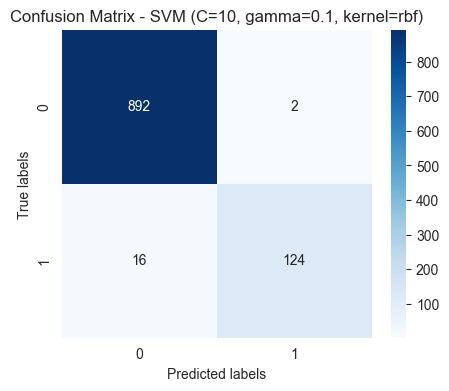

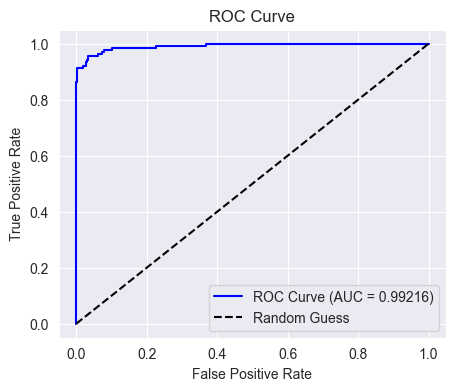


==> BoW Unigram Predictor:
Model Evaluation Metrics:
Accuracy: 0.98066
Precision: 0.98071
Recall: 0.98066
F1-Score: 0.98016
AUC: 0.99230


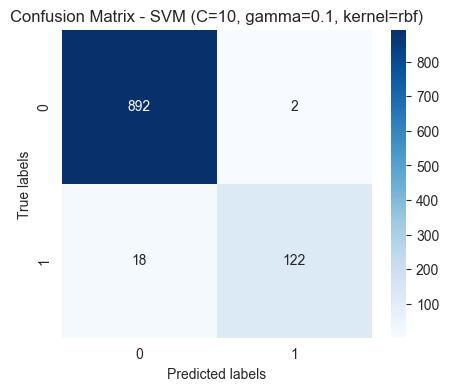

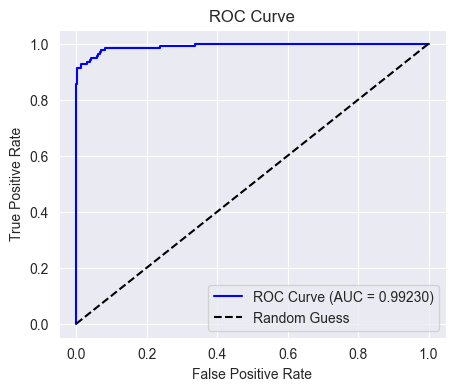


==> BoW Bigram Predictor:
Model Evaluation Metrics:
Accuracy: 0.98162
Precision: 0.98182
Recall: 0.98162
F1-Score: 0.98112
AUC: 0.99136


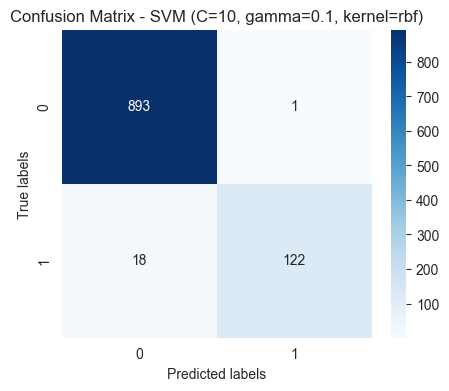

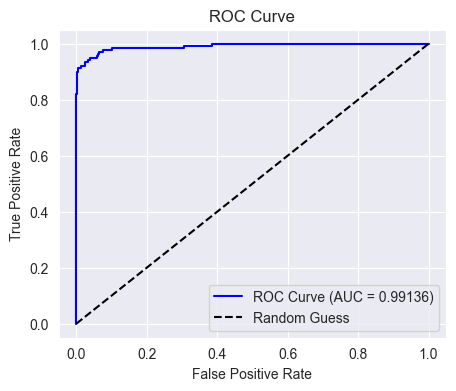


==> BoW Trigram Predictor:
Model Evaluation Metrics:
Accuracy: 0.98066
Precision: 0.98071
Recall: 0.98066
F1-Score: 0.98016
AUC: 0.99185


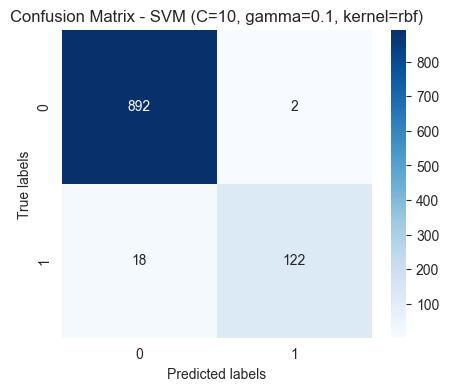

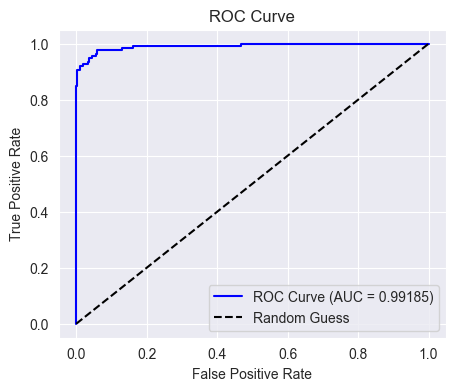

In [150]:
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt

# Function to train and evaluate SVM with the best hyperparameters
def train_svm_with_best_hyperparameters(X_train, X_test, y_train, y_test, C=10, degree=0, gamma=0.1, kernel='rbf'):
    # Initialize SVM with best parameters
    svm = SVC(C=C, degree=degree, gamma=gamma, kernel=kernel, probability=True)
    
    # Train the model
    svm.fit(X_train, y_train)
    
    # Make predictions
    y_pred = svm.predict(X_test)
    y_proba = svm.predict_proba(X_test)[:, 1] if len(svm.classes_) == 2 else None  # Probability for ROC and AUC
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    auc = roc_auc_score(y_test, y_proba, average='weighted', multi_class='ovr') if y_proba is not None else None
    
    # Print metrics
    print("Model Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.5f}")
    print(f"Precision: {precision:.5f}")
    print(f"Recall: {recall:.5f}")
    print(f"F1-Score: {f1:.5f}")
    if auc is not None:
        print(f"AUC: {auc:.5f}")
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=svm.classes_, yticklabels=svm.classes_)
    plt.title(f'Confusion Matrix - SVM (C={C}, gamma={gamma}, kernel={kernel})')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

    # ROC Curve (only for binary classification)
    if y_proba is not None:
        fpr, tpr, thresholds = roc_curve(y_test, y_proba)
        plt.figure(figsize=(5, 4))
        plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.5f})', color='blue')
        plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
        plt.title('ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.show()

# Evaluate SVM with best hyperparameters for different feature representations
print("==> Normalized Text Predictor:")
train_svm_with_best_hyperparameters(X_train_features, X_test_features, y_train, y_test, C=10, degree=0, gamma=0.1, kernel='rbf')

print("\n==> BoW Unigram Predictor:")
train_svm_with_best_hyperparameters(X_train_bow_unigram, X_test_bow_unigram, y_train, y_test, C=10, degree=0, gamma=0.1, kernel='rbf')

print("\n==> BoW Bigram Predictor:")
train_svm_with_best_hyperparameters(X_train_bow_bigram, X_test_bow_bigram, y_train, y_test, C=10, degree=0, gamma=0.1, kernel='rbf')

print("\n==> BoW Trigram Predictor:")
train_svm_with_best_hyperparameters(X_train_bow_trigram, X_test_bow_trigram, y_train, y_test, C=10, degree=0, gamma=0.1, kernel='rbf')


> Therefore, the SVM is a best fitted model with the best hyper-parameter tuning SVC(C=10, degree=0, gamma=0.1) and the best predictor is Normalized Text Predictor. The Normalized Text Predictor is the best overall based on its highest Accuracy, Precision, Recall, and F1-Score. Although the BoW Unigram Predictor achieves a marginally higher AUC, the normalized text representation outperforms in all other metrics and is the most balanced option.

In [206]:
import pickle
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to save the trained model
def save_model(model, file_path):
    """
    Save the trained model to a file.

    Parameters:
    - model: Trained model to save
    - file_path: File path where the model will be saved
    """
    with open(file_path, 'wb') as f:
        pickle.dump(model, f)
    print(f"Model saved to {file_path}.")

# Function to train and save the SVM with specified hyperparameters
def train_and_save_svm(X_train, X_test, y_train, y_test, 
                       C=10, degree=0, gamma=0.1, kernel='rbf', 
                       model_file_path="svm_model.pkl"):
 
    # Initialize the SVM model
    svm = SVC(C=C, degree=degree, gamma=gamma, kernel=kernel, probability=True)
    
    # Train the model
    print("Training the SVM model...")
    svm.fit(X_train, y_train)
    
    # Save the trained model
    save_model(svm, model_file_path)
    
    # Make predictions on the test set
    print("Evaluating the model...")
    y_pred = svm.predict(X_test)
    
    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    # Display evaluation metrics
    print("\nModel Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.5f}")
    print(f"Precision: {precision:.5f}")
    print(f"Recall: {recall:.5f}")
    print(f"F1-Score: {f1:.5f}")

# Example usage: Train and save SVM for normalized text predictor
if __name__ == "__main__":
    print("==> Normalized Text Predictor:")
    train_and_save_svm(
        X_train_features, 
        X_test_features, 
        y_train, 
        y_test, 
        C=10, 
        degree=0, 
        gamma=0.1, 
        kernel='rbf', 
        model_file_path="svm_model_normalized_text.pkl"
    )


==> Normalized Text Predictor:
Training the SVM model...
Model saved to svm_model_normalized_text.pkl.
Evaluating the model...

Model Evaluation Metrics:
Accuracy: 0.98259
Precision: 0.98262
Recall: 0.98259
F1-Score: 0.98220


### Implement model to classify the news type.

In [214]:
import pickle
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

# Preprocessing functions
def lowercase_text(text):
    return text.lower()

def tokenize_text(text):
    return word_tokenize(text)

def remove_special_characters(tokens):
    return [re.sub(r'[^a-zA-Z0-9]', '', token) for token in tokens if token.isalnum()]

def remove_stopwords_and_punctuation(tokens):
    stop_words = set(stopwords.words('english'))
    return [token for token in tokens if token not in stop_words]

def remove_urls(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

def stem_tokens(tokens):
    stemmer = PorterStemmer()
    return [stemmer.stem(token) for token in tokens]

# Feature extraction function
def extract_features(texts):
    tfidf_vectorizer = TfidfVectorizer(max_features=5000)
    return tfidf_vectorizer.fit_transform(texts), tfidf_vectorizer

# Preprocess and transform email text
def preprocess_and_transform(email_text, vectorizer=None):
    email_text = lowercase_text(email_text)
    tokens = tokenize_text(email_text)
    tokens = remove_special_characters(tokens)
    tokens = remove_stopwords_and_punctuation(tokens)
    email_text = remove_urls(' '.join(tokens))
    tokens = tokenize_text(email_text)
    stemmed_tokens = stem_tokens(tokens)
    preprocessed_text = ' '.join(stemmed_tokens)

    # Use vectorizer to extract features
    if vectorizer:
        return vectorizer.transform([preprocessed_text])
    else:
        # Create vectorizer if none exists
        return extract_features([preprocessed_text])[0]

# Sample training data (replace with actual labeled data)
emails = df['text']
labels = df['type']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(emails, labels, test_size=0.2, random_state=42)

# Extract features from the training data
X_train_features, vectorizer = extract_features(X_train)
X_test_features = vectorizer.transform(X_test)

# Initialize the SVM model
svm = SVC(C=10, degree=0, gamma=0.1, kernel='rbf', probability=True)

# Train the model
svm.fit(X_train_features, y_train)

# Evaluate the model
y_pred = svm.predict(X_test_features)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print(f"Accuracy: {accuracy:.5f}")
print(f"Precision: {precision:.5f}")
print(f"Recall: {recall:.5f}")
print(f"F1-Score: {f1:.5f}")

# Save the trained model and vectorizer
def save_model_and_vectorizer(svm_model, vectorizer, model_path="formal_svm_model.pkl", vectorizer_path="formal_vectorizer.pkl"):
    with open(model_path, 'wb') as model_file:
        pickle.dump(svm_model, model_file)
    with open(vectorizer_path, 'wb') as vectorizer_file:
        pickle.dump(vectorizer, vectorizer_file)
    
    print(f"Model saved to {model_path}")
    print(f"Vectorizer saved to {vectorizer_path}")

# Save the model and vectorizer
save_model_and_vectorizer(svm, vectorizer)

# Example to load the model and vectorizer later for prediction
def load_model_and_vectorizer(model_path="formal_svm_model.pkl", vectorizer_path="formal_vectorizer.pkl"):
    with open(model_path, 'rb') as model_file:
        svm_model = pickle.load(model_file)
    with open(vectorizer_path, 'rb') as vectorizer_file:
        vectorizer = pickle.load(vectorizer_file)
    
    return svm_model, vectorizer

Accuracy: 0.98356
Precision: 0.98349
Recall: 0.98356
F1-Score: 0.98329
Model saved to formal_svm_model.pkl
Vectorizer saved to formal_vectorizer.pkl


In [215]:
# To load the model and vectorizer
svm_model, vectorizer = load_model_and_vectorizer()

# Predict on a new email
email_text = "Congratulations! You've won a $1000 gift card. Click here to claim your prize."
email_features = preprocess_and_transform(email_text, vectorizer)
prediction = svm_model.predict(email_features)

# Print the result
print(f"The email is: {'spam' if prediction[0] == 1 else 'not spam'}")

The email is: spam


In [216]:
emails = emails = [
    "Congratulations! You've won a $1000 gift card. Click here to claim your prize.",
    "Hello, we have a meeting tomorrow at 10 AM. Let me know if you can attend.",
    "Free gift card for signing up! Don't miss out on this amazing opportunity.",
    "Hi there, I hope you're doing well. Let me know when we can catch up.",
    "Your app is in the oven"
]

for e in emails:
    email_features = preprocess_and_transform(e, vectorizer)
    prediction = svm_model.predict(email_features)

    # Print the result
    print(f"The email is: {'spam' if prediction[0] == 1 else 'not spam'}")

The email is: spam
The email is: not spam
The email is: not spam
The email is: not spam
The email is: spam
